### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Part 1: Cleaning and Exploration of Data

In [2]:
def load_dataset():
    return pd.read_csv('googleplaystore.csv')

In [3]:
data = load_dataset()

In [4]:
def print_summarize_dataset(data):
    pd.set_option('display.max_columns', 13)
    print("Dataset dimension:")
    print(data.shape)
    print('')
    print("First 10 rows of dataset:")
    print(data.head(10))
    print('')
    print("Statistical summary:")
    print(data.describe())

In [5]:
print_summarize_dataset(data)

Dataset dimension:
(10841, 13)

First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0 

From the above stat, we can see that some columns that are supposed to be integer/float columns are not clean enough for our stat and will affect our analysis.
So they need some cleaning. Columns that needs cleaning are: <br>
* Installs 
* Price
* Reviews
* Size


In [6]:
## first changing the letter casing of the column names to lower case for easy typing
data.columns = data.columns.str.lower()

#### Cleaning the installs column

In [7]:
data.installs.sample(5)

8913          50,000+
9346           1,000+
6444              10+
8758     100,000,000+
10491            500+
Name: installs, dtype: object

In [8]:
# reomving the '+' sign and ',' sign and then changing it to an integer column
data['installs'] = data.installs.apply(lambda x: x.replace('+', '').replace(',', ''))
data['installs'] = data.installs.apply(lambda x: np.nan if x == 'Free' else x).astype('float')
data.installs.sample(3)

6499        5000.0
4417        5000.0
3470    10000000.0
Name: installs, dtype: float64

#### Cleaning the price column

In [9]:
data.price.isnull().sum()

0

In [10]:
data.price.sample(10)

2358         0
745          0
2001         0
10062        0
5530         0
4734         0
4079         0
5399         0
3243         0
7629     $2.99
Name: price, dtype: object

In [11]:
# price column is a little bit different because it contains some words that cannot be used for the analysis
# So I will be writing a function to take care of that

def remove(item):
    try:
        item = str(item).replace('$', '')
        return float(item)
    except:
        return np.nan
    
data['price'] = data.price.apply(lambda x: remove(x))

#### Cleaning the review column

In [12]:
# In this column, there is a value containing the 'M' meaning million so we would need to replace it 
data['reviews'] = data.reviews.apply(lambda x: x.replace('.0M', '000000')).astype('int')

#### Cleaning the Size column

In [13]:
data['size'].sample(6)

4029                  2.1M
3120                   33M
7234                   10M
4259    Varies with device
6568                   26M
6581                   31M
Name: size, dtype: object

In [14]:
# so I need to write a function that converts the size into bytes
# M = * 1000000, K = * 000

def convert_size(item):
    try:
        if 'M' in str(item) and '.' in str(item):
            item = str(item).replace('M', '00000')
            
        elif 'M' in str(item):
            item = str(item).replace('M', '000000')
            
        elif 'K' in str(item) and '.' in str(item):
            item = str(item).replace('K', '00')
            
        elif 'K' in str(item):
            item = str(item).replace('K', '000')
            
        return int(item.replace('.', '')) / 1000000 # removing the . from each value item if it exist and then converting from kb to mb
    except:
        return np.nan

In [15]:
 data['size'] = data['size'].apply(lambda x: convert_size(x))

In [16]:
def clean_dataset(data):
    return data.dropna()

In [17]:
# cleaning the data 
data = clean_dataset(data)

In [36]:
def print_histograms(data):
    data.hist(figsize = (16,12))
    plt.title('Histograms for each numerical column')
    plt.savefig('histograms.jpg')
    plt.show()

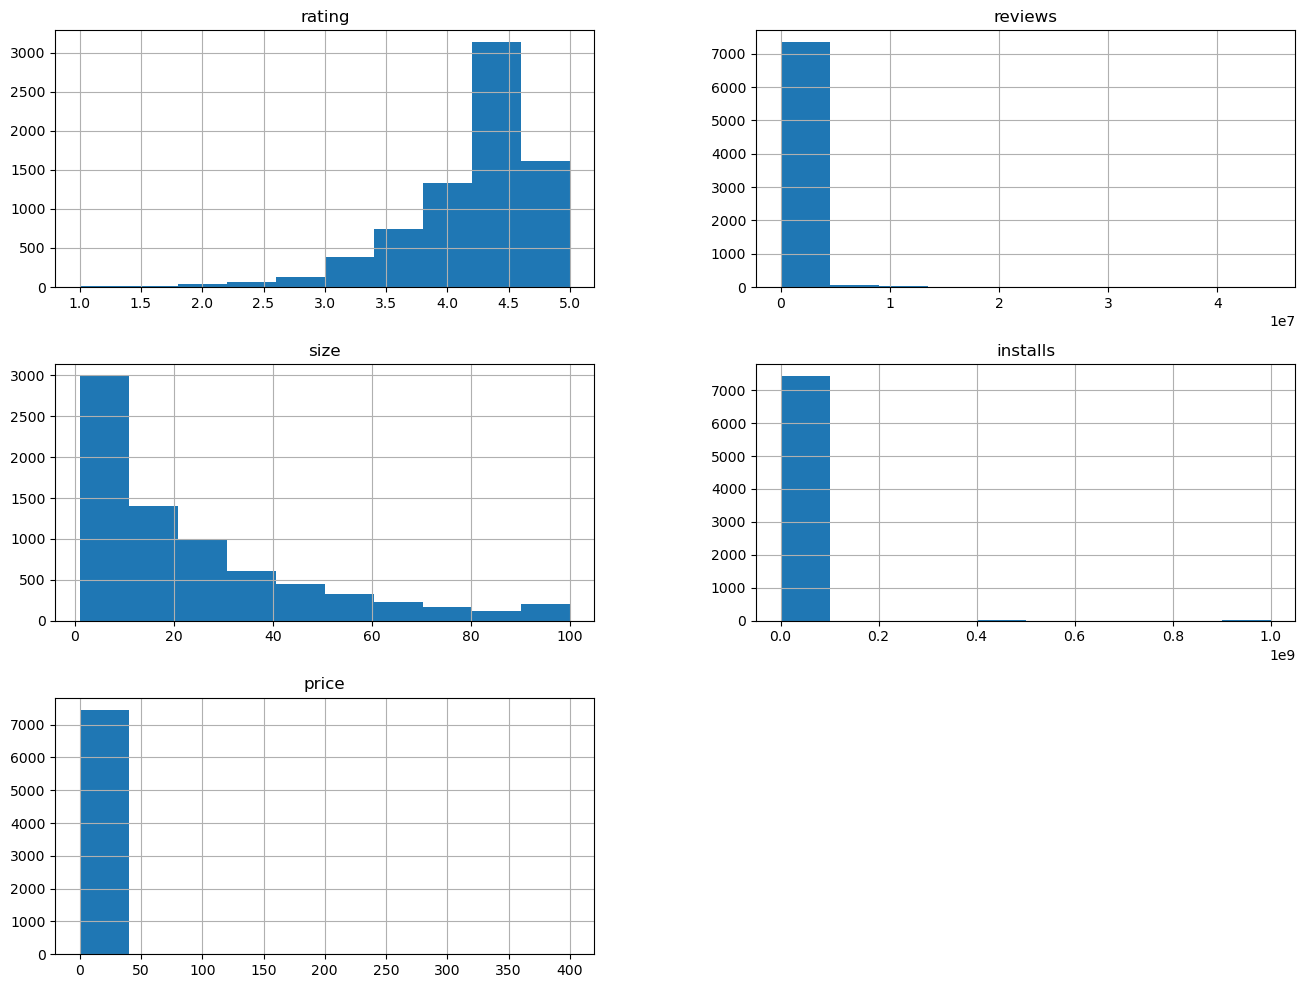

In [37]:
# printing the histograms
print_histograms(data)

In [45]:
def compute_correlations_matrix(data):
    corr = data.corr()
    figure = figsize = (18, 12)
    sns.heatmap(corr, annot = True)
    plt.title('Correlation Heatmap for Numerical Attributes')
    plt.savefig('heatmap.jpg')
    plt.show()

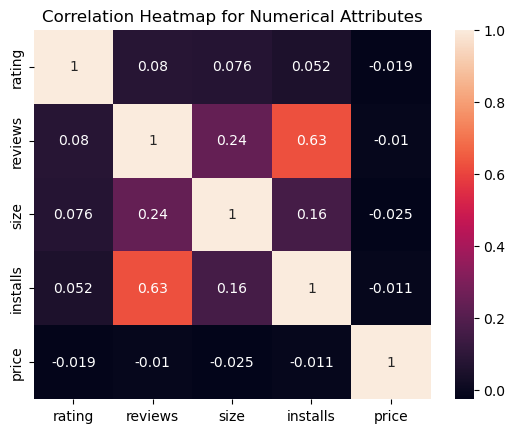

In [46]:
compute_correlations_matrix(data)

In [22]:
def print_scatter_matrix(data):
    scatter_matrix(data)
    plt.show()

### Part 2: Report Analysis

* Plot with bar diagram the most populars paid apps of Family category

* Plot with a pie diagram the most popular genres according to the number of installations from paid family

* An array with the number of installation per category

* Plot a pie with the number of installation per category

* Plot a bar with the mean price per category

#### Some questions to answer

* Which category of apps has the highest rating on average?

* Which category of apps has the highest number of reviews?

* What is the average size of apps in each category?

* What category of apps has the highest rating on average?

* What is the most popular app in each category based on the number of installs?

* Which category of apps has the highest number of reviews?

* What is the average size of apps in each category?


Click this <a href="https://medium.com/@yasmeenabdulazeez/exploring-trends-and-patterns-an-analysis-of-google-play-store-data-72a81b41284c">link</a> to see report article

In [23]:
# creating a function to generate random colors for each plot
def generate_color(color_len):
    return [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(color_len)]

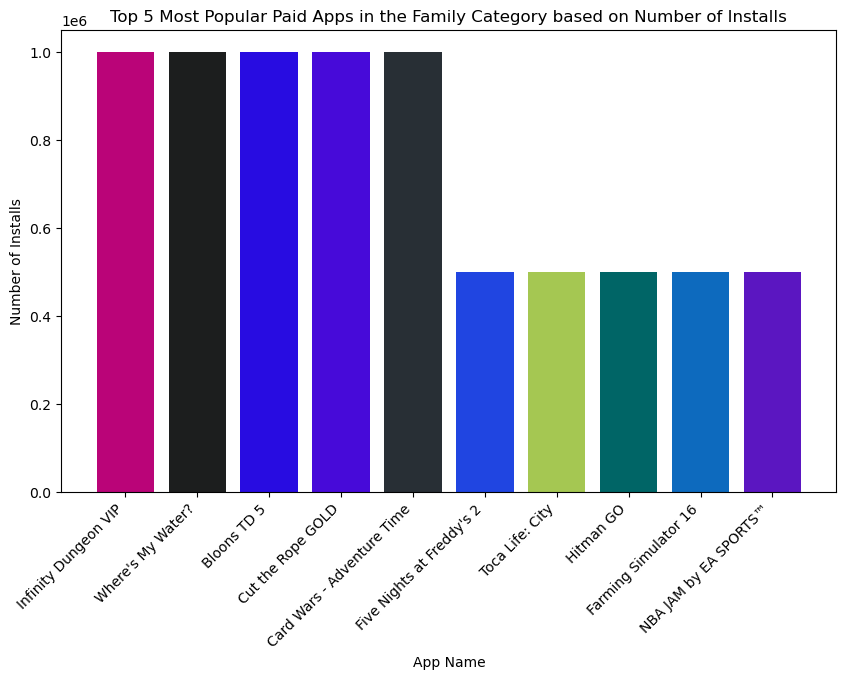

In [24]:
# Filter the dataset to only include Family apps that are paid
family_paid_apps = data[(data.category == 'FAMILY') & (data.type == 'Paid')]

# Sort the apps by the number of installs in descending order
sorted_apps = family_paid_apps.sort_values(by=['installs'], ascending=False)

# Set random colors for each bar
colors = generate_color(len(sorted_apps))

# Create a bar chart of the top 5 most popular paid apps in the Family category
top_apps = sorted_apps[:10]
plt.figure(figsize=(10,6))
plt.bar(x=top_apps['app'], height=top_apps['installs'], color=colors)

# Add labels and title
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.title('Top 5 Most Popular Paid Apps in the Family Category based on Number of Installs')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()



The *Card Wars - Adventure time* is the most popular family paid app based on the number of installs. The plot above shows the amount of installs

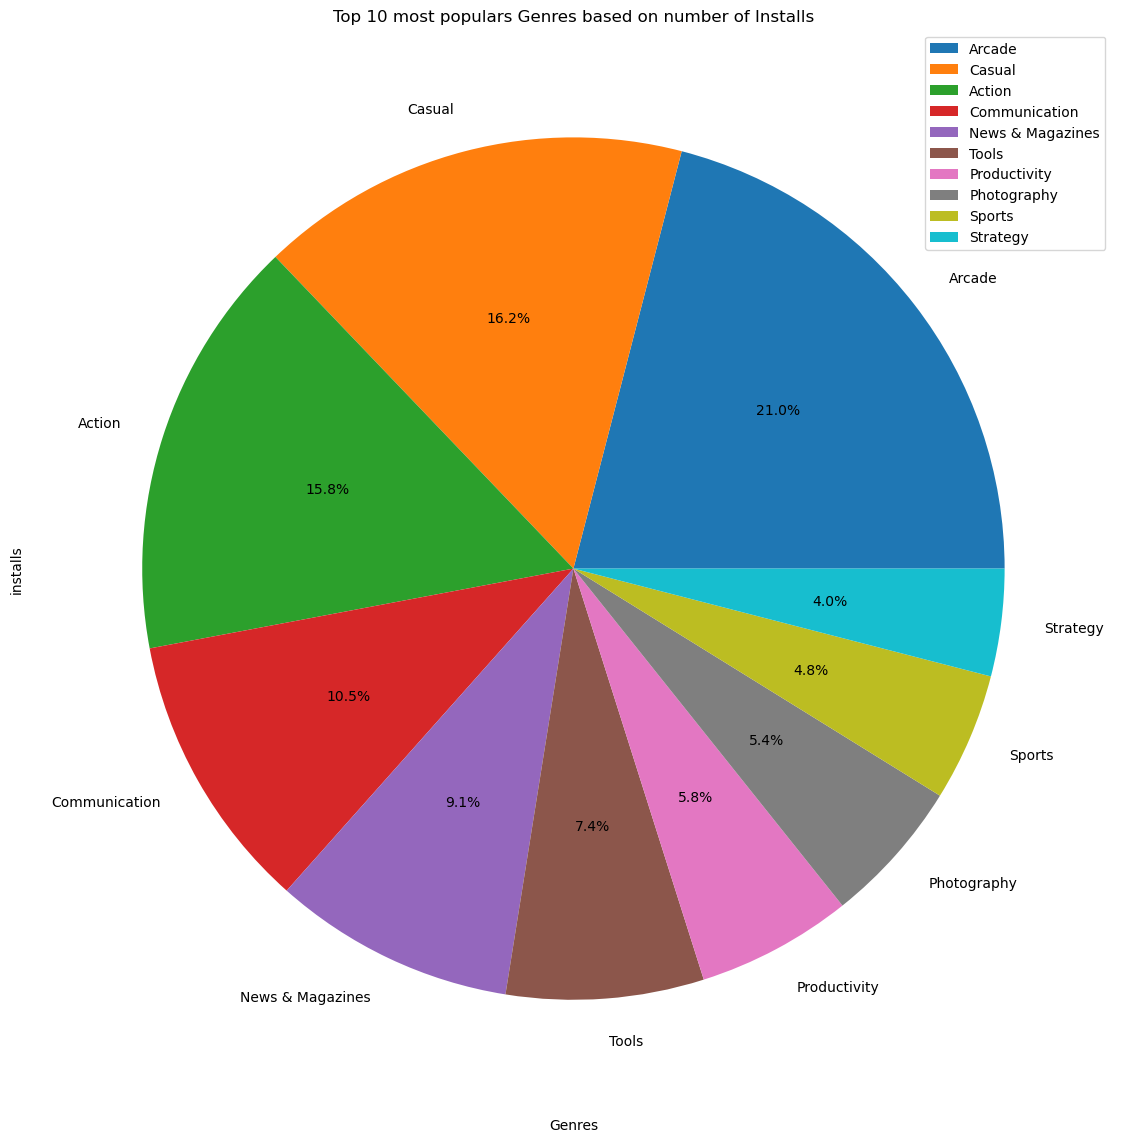

In [25]:
data.groupby('genres')['installs'].sum().sort_values(ascending = False)[:10].plot(kind = 'pie', autopct='%1.1f%%',  figsize = (18, 14))
plt.title('Top 10 most populars Genres based on number of Installs')
plt.xlabel('Genres')
plt.legend(loc = 'upper right')
plt.show()

In [26]:
array = list(data.groupby('category')['installs'].count())

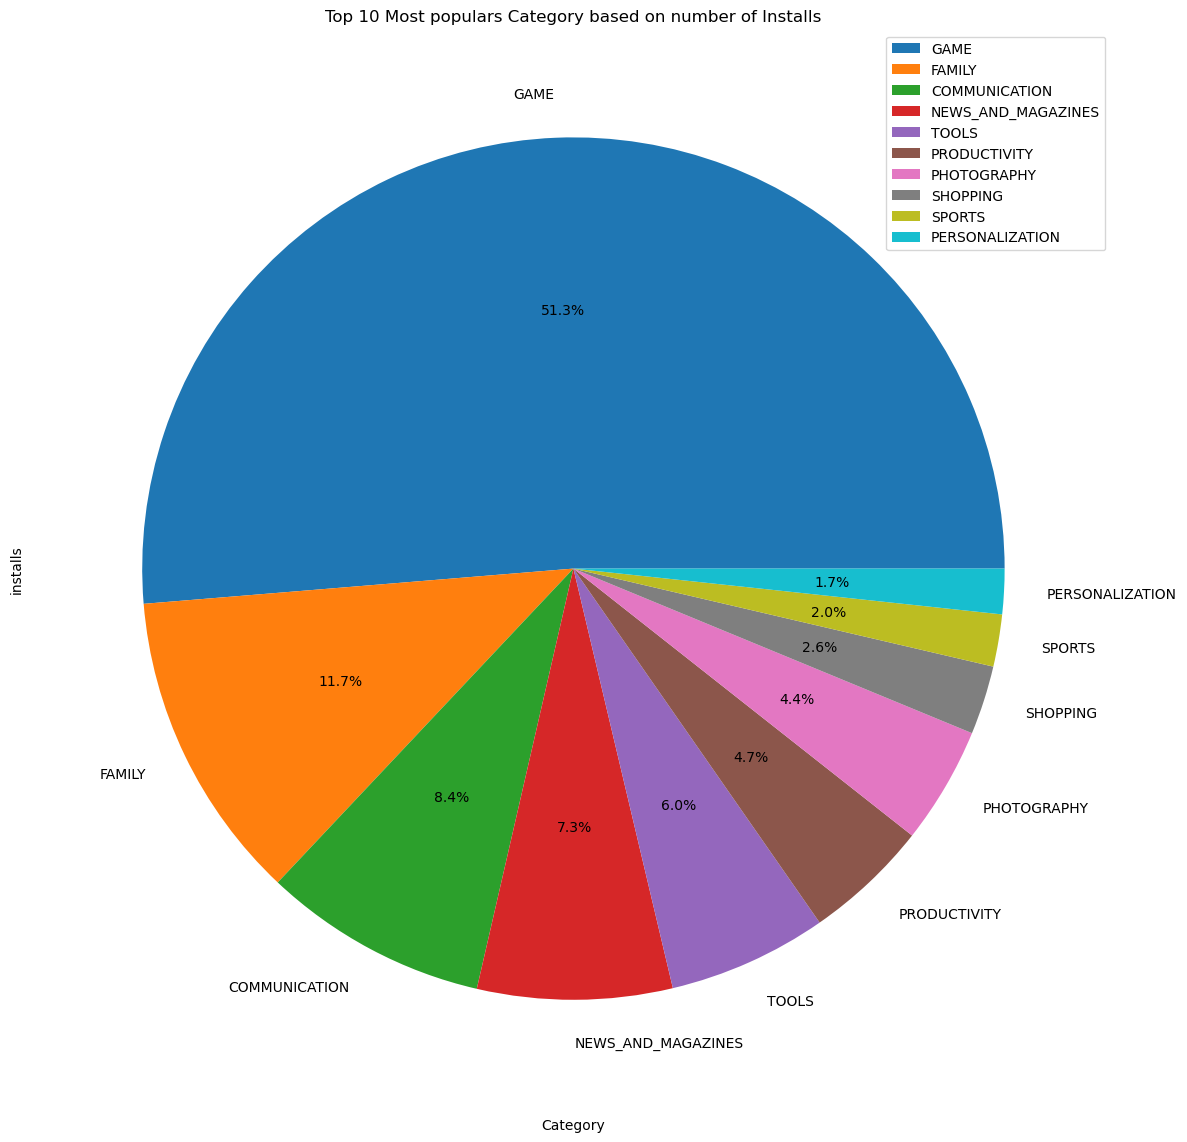

In [47]:
data.groupby('category')['installs'].sum().sort_values(ascending = False)[:10].plot(kind = 'pie', autopct='%1.1f%%',  figsize = (18, 14))
plt.title('Top 10 Most populars Category based on number of Installs')
plt.xlabel('Category')
plt.legend(loc='upper right', fontsize=10)
plt.savefig("Most_category", bbox_inches = 'tight')
plt.show()

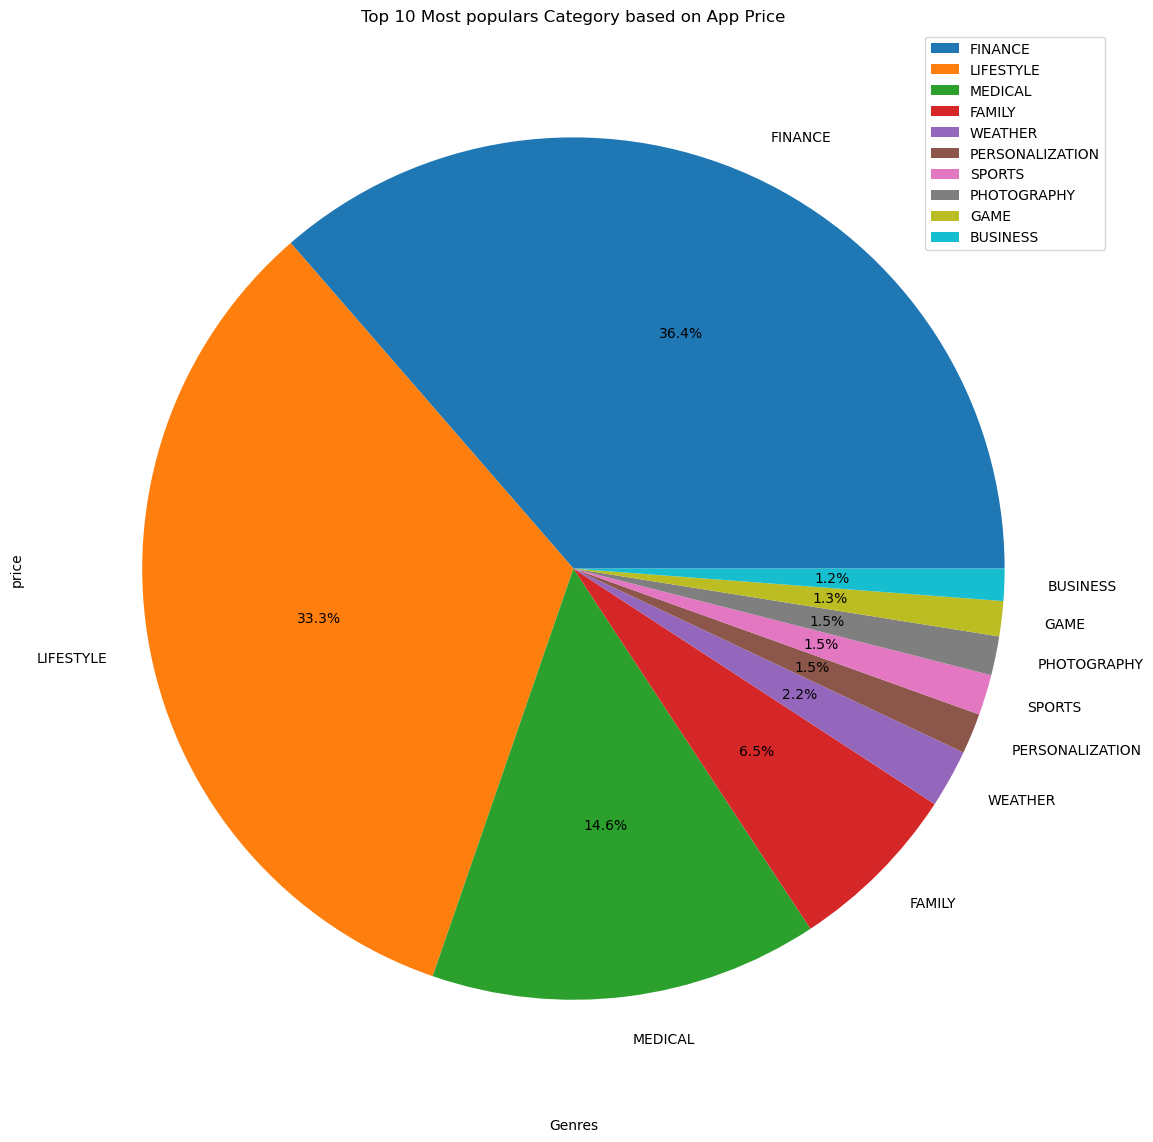

In [49]:
data.groupby('category')['price'].mean().sort_values(ascending = False)[:10].plot(kind = 'pie', autopct='%1.1f%%',  figsize = (18, 14))
plt.title('Top 10 Most populars Category based on App Price')
plt.xlabel('Genres')
plt.legend()
plt.savefig("popular_price_app.jpg", bbox_inches = 'tight')
plt.show()

## What is the average price for each Category?

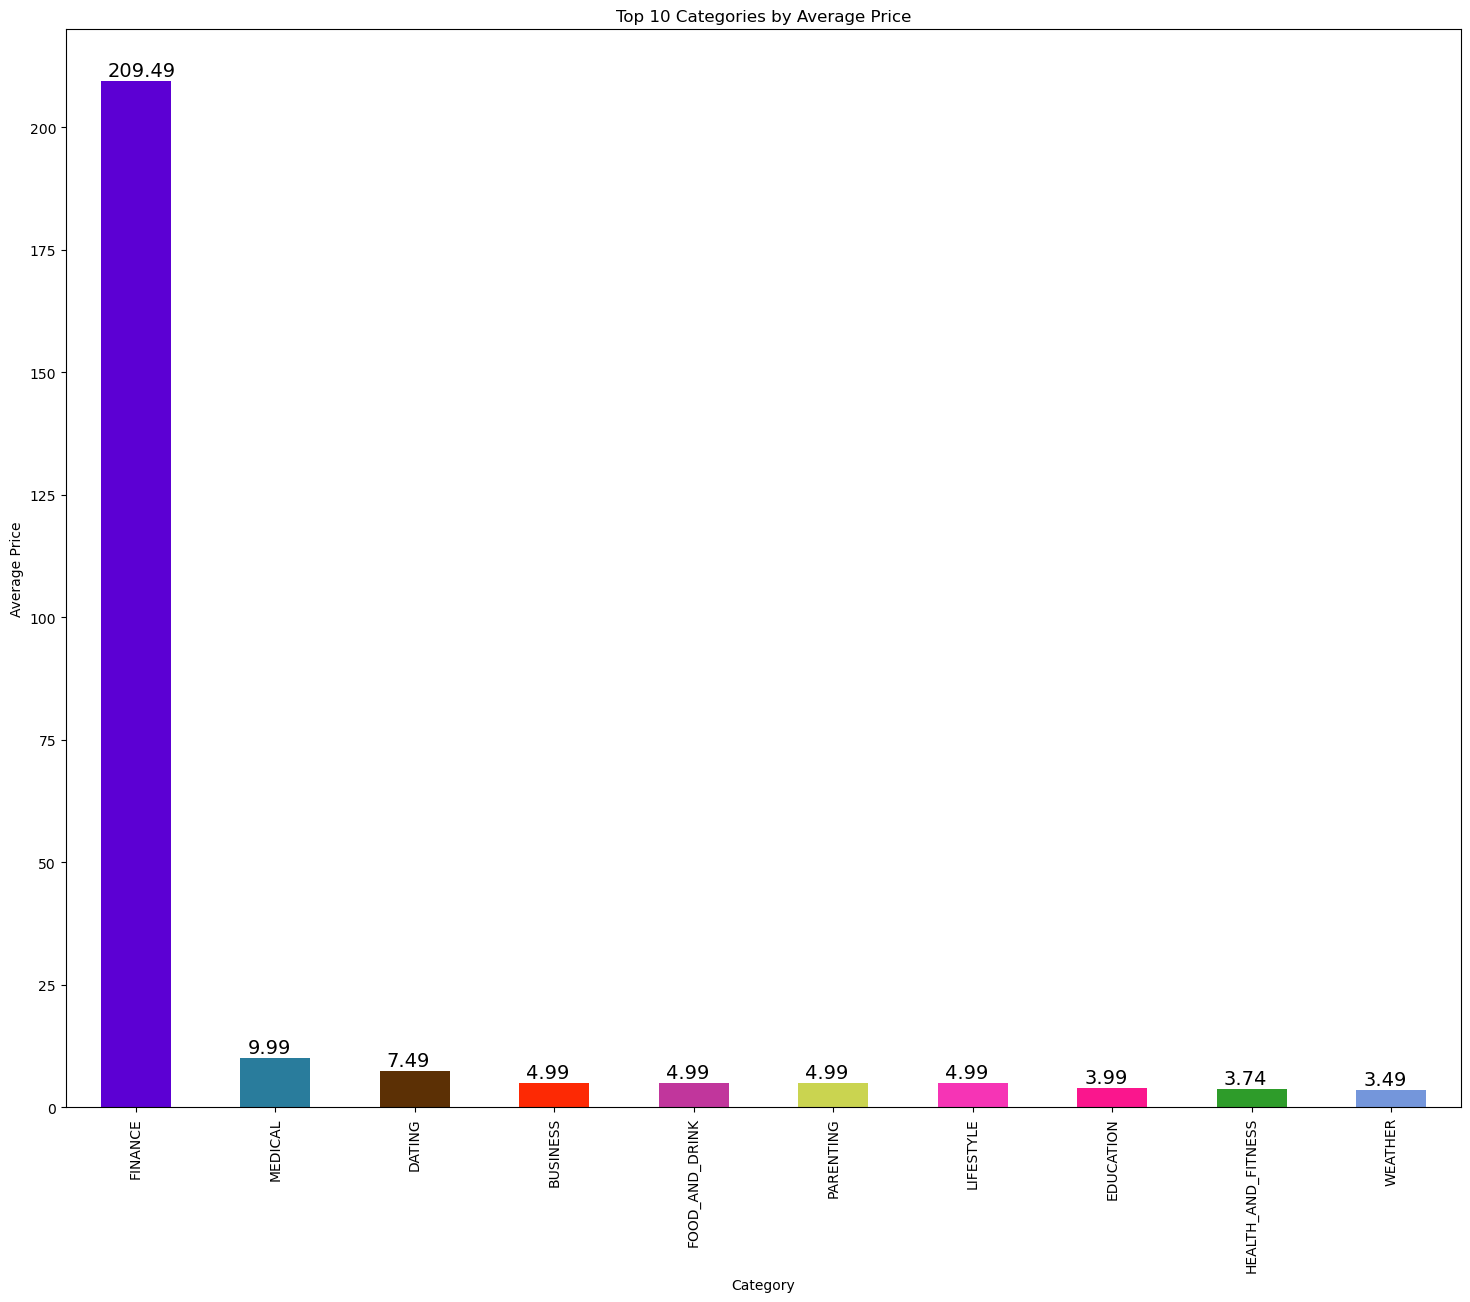

In [50]:
# i need to filter out the paid app first before calculating the mean so as to avoid the effect of outliers
paid = data.loc[data['type'] == 'Paid']

# Plot a bar with the mean price per category
top_categories = paid.groupby('category')['price'].median().sort_values(ascending=False)[:10]
colors = generate_color(len(top_categories))

plt.figure(figsize=(18,14))
ax = top_categories.plot(kind='bar', color=colors)
plt.title('Top 10 Categories by Average Price')
plt.xlabel('Category')
plt.ylabel('Average Price')

# Add annotations to the bars
for i, v in enumerate(top_categories):
    ax.text(i-0.2, v+1, str(round(v, 2)), color='black', fontsize=14)
    

# saving the plot
plt.savefig('average_price.png', bbox_inches = 'tight')

# display the plot
plt.show()

## What are the most expensive apps for each Category?

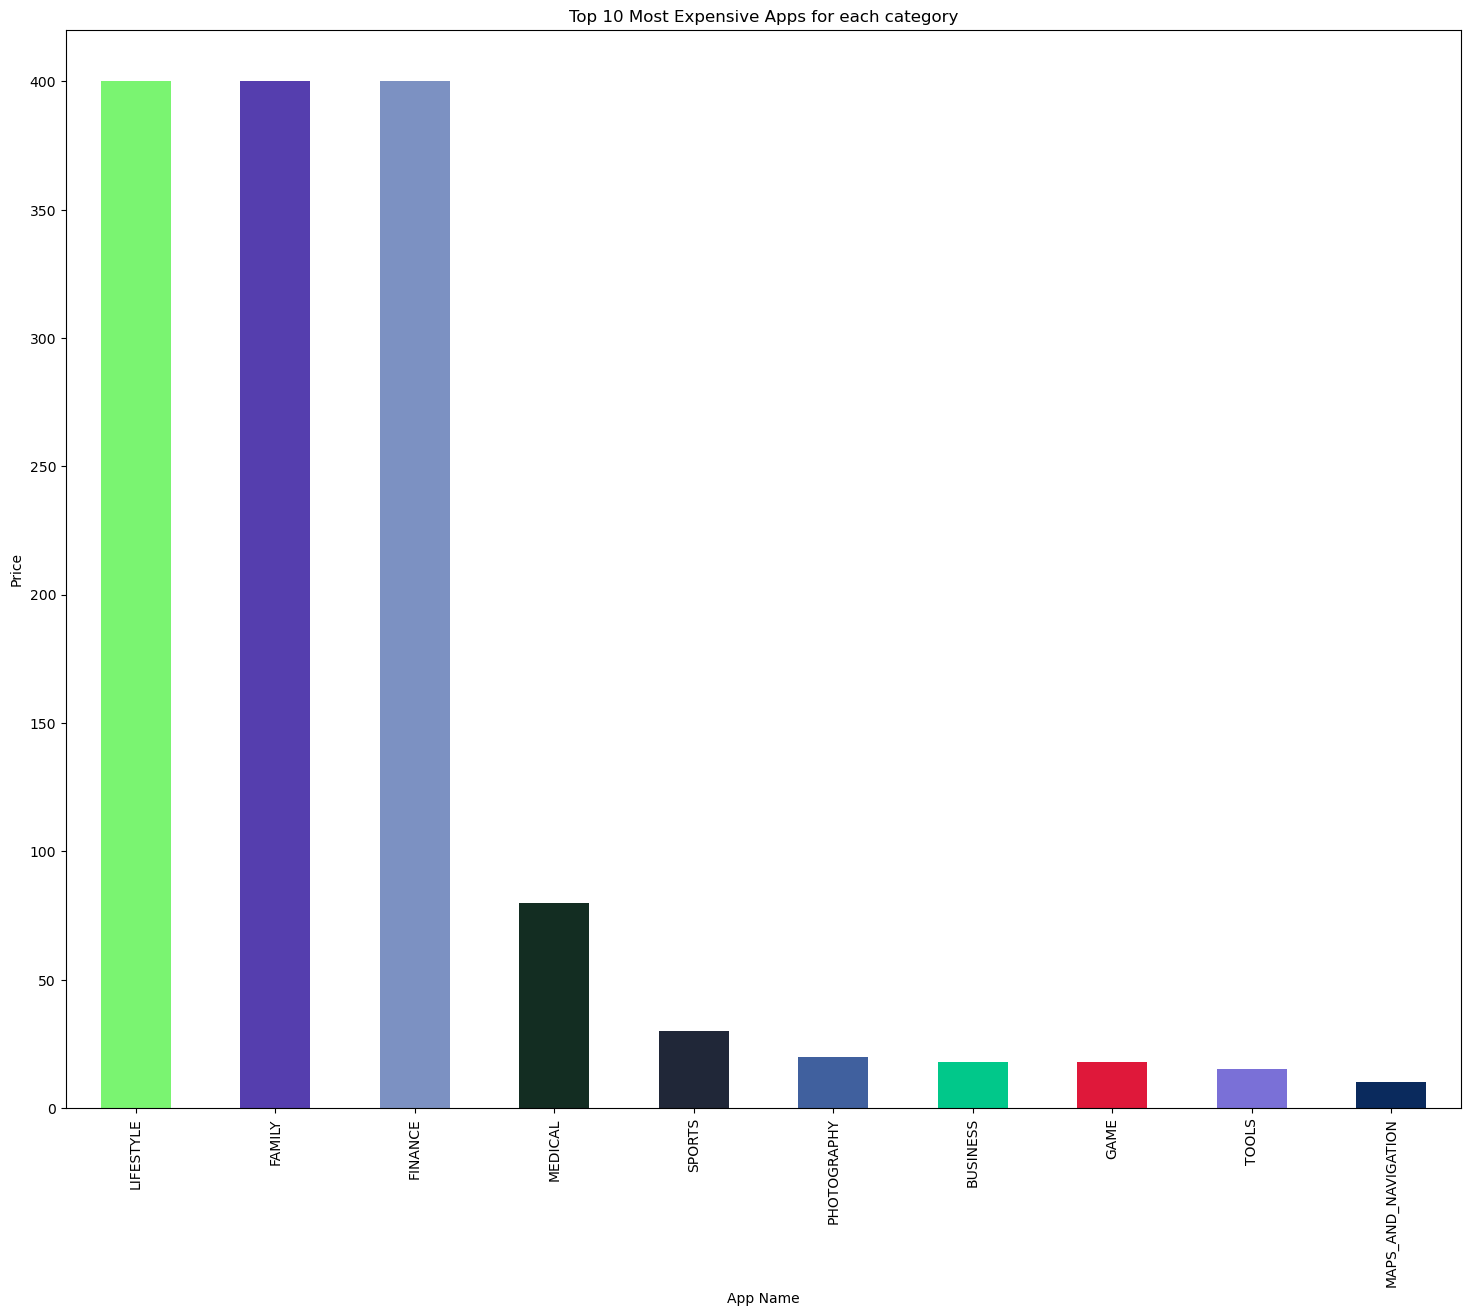

In [30]:
# Filter the dataset to only include Family apps that are paid
paid_apps = data[data.type == 'Paid']

# Set random colors for each bar
colors = generate_color(10)
paid_apps.groupby('category')['price'].max().sort_values(ascending = False)[:10].plot(kind = 'bar', color = colors, figsize = (18, 14))


# Add labels and title
plt.xlabel('App Name')
plt.ylabel('Price')
plt.title('Top 10 Most Expensive Apps for each category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Which category of apps has the highest number of reviews/ ratings?

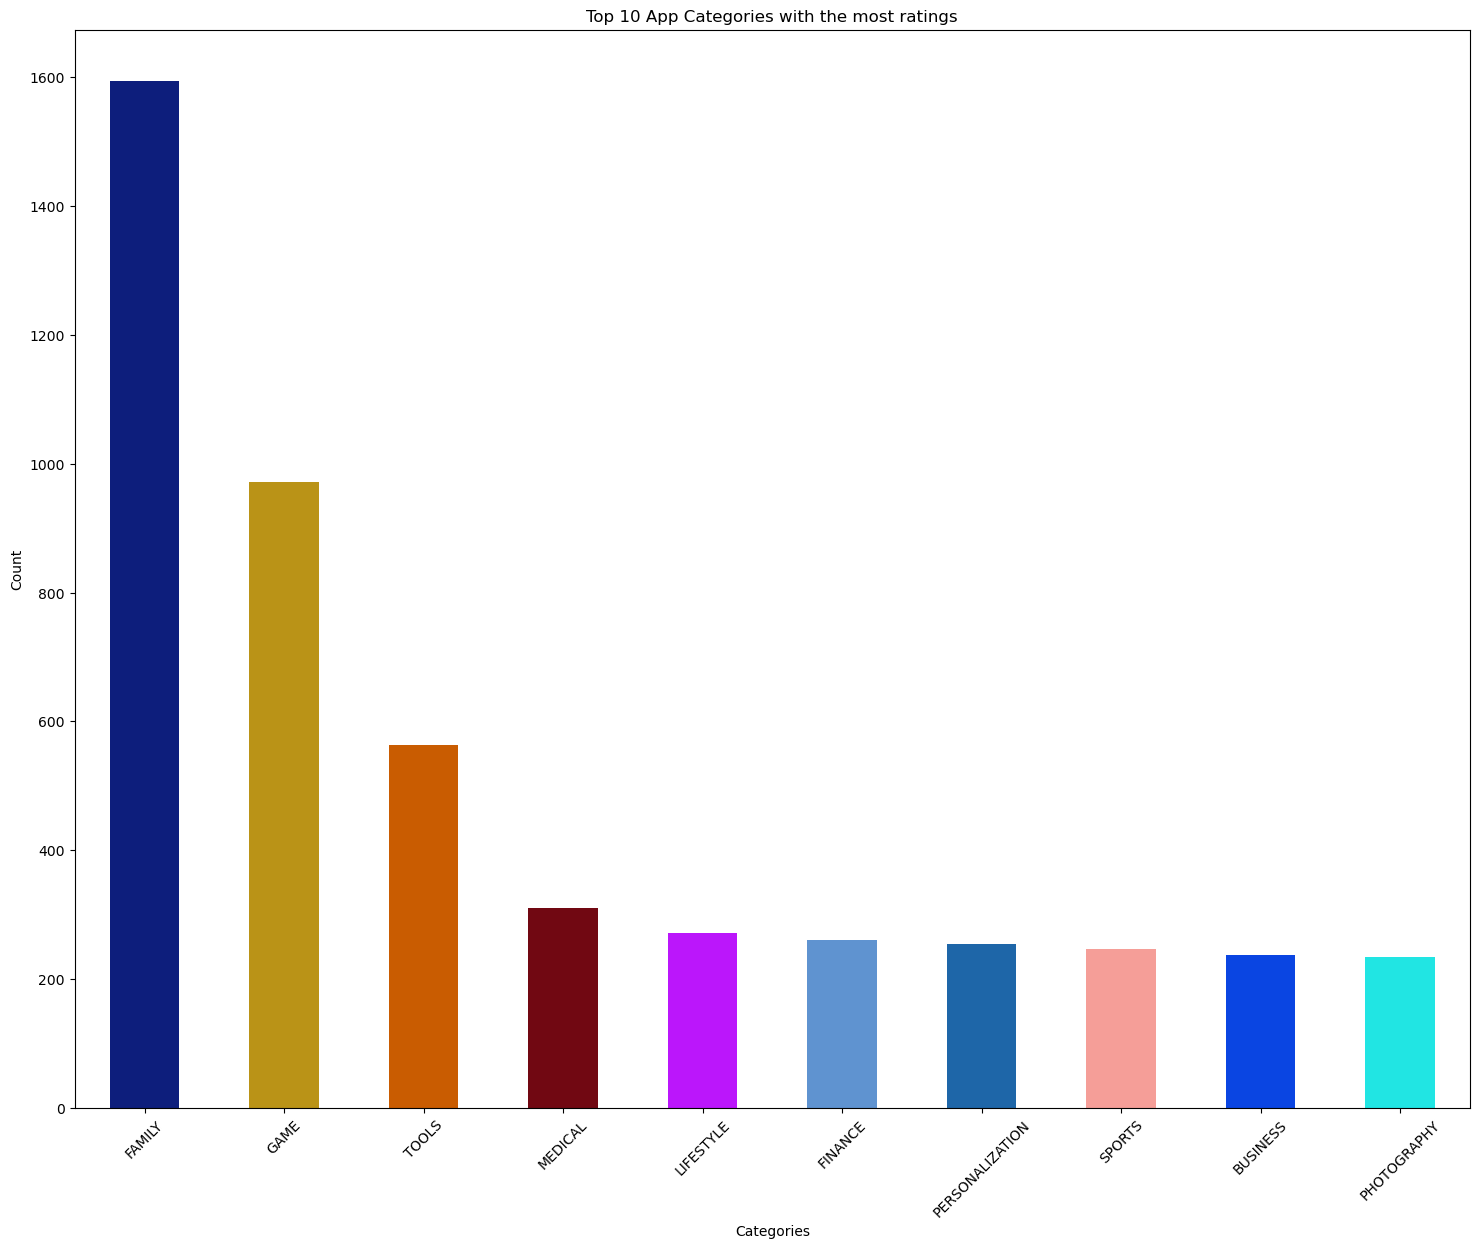

In [51]:
colors = generate_color(10)
data.groupby('category')['rating'].count().sort_values(ascending = False)[:10].plot(kind = 'bar', color = colors, figsize = (18, 14))
plt.title('Top 10 App Categories with the most ratings')
plt.ylabel('Count')
plt.xlabel('Categories')
plt.xticks(rotation = 45)
plt.savefig('reviews_cat.png', bbox_inches = 'tight')
plt.show()

## What is the average rating of reviews/rating for each Category?

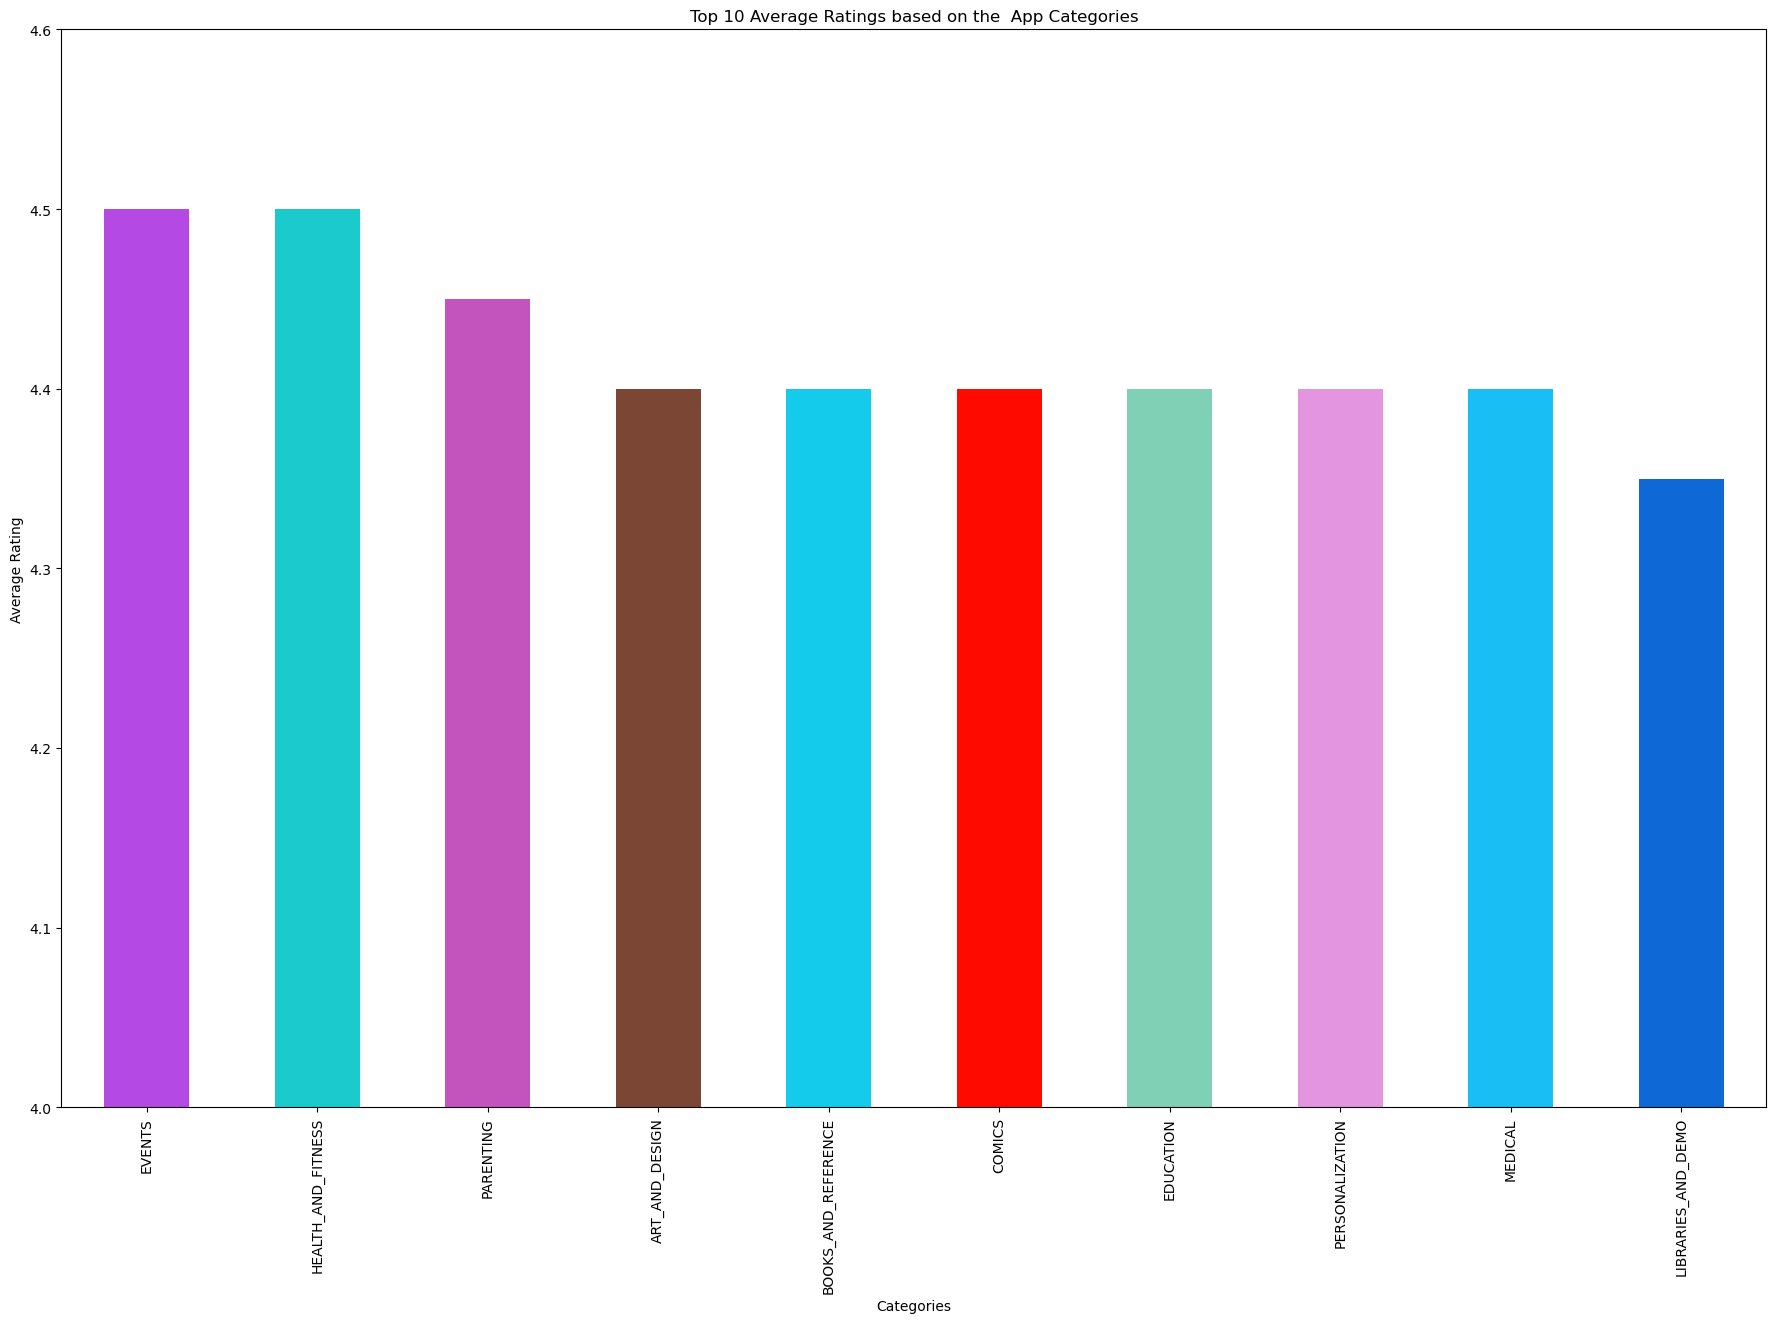

In [52]:
plt.figure(figsize = (22, 14))
colors = generate_color(10)
data.groupby('category')['rating'].median().sort_values(ascending = False)[:10].plot(kind = 'bar', color = colors)
plt.ylim(4, 4.6)
plt.title("Top 10 Average Ratings based on the  App Categories") # this title needs to be changed, it does not sound right
plt.xlabel("Categories")
plt.ylabel("Average Rating")
plt.savefig('cat_rating_1.png', bbox_inches = 'tight')
plt.show()

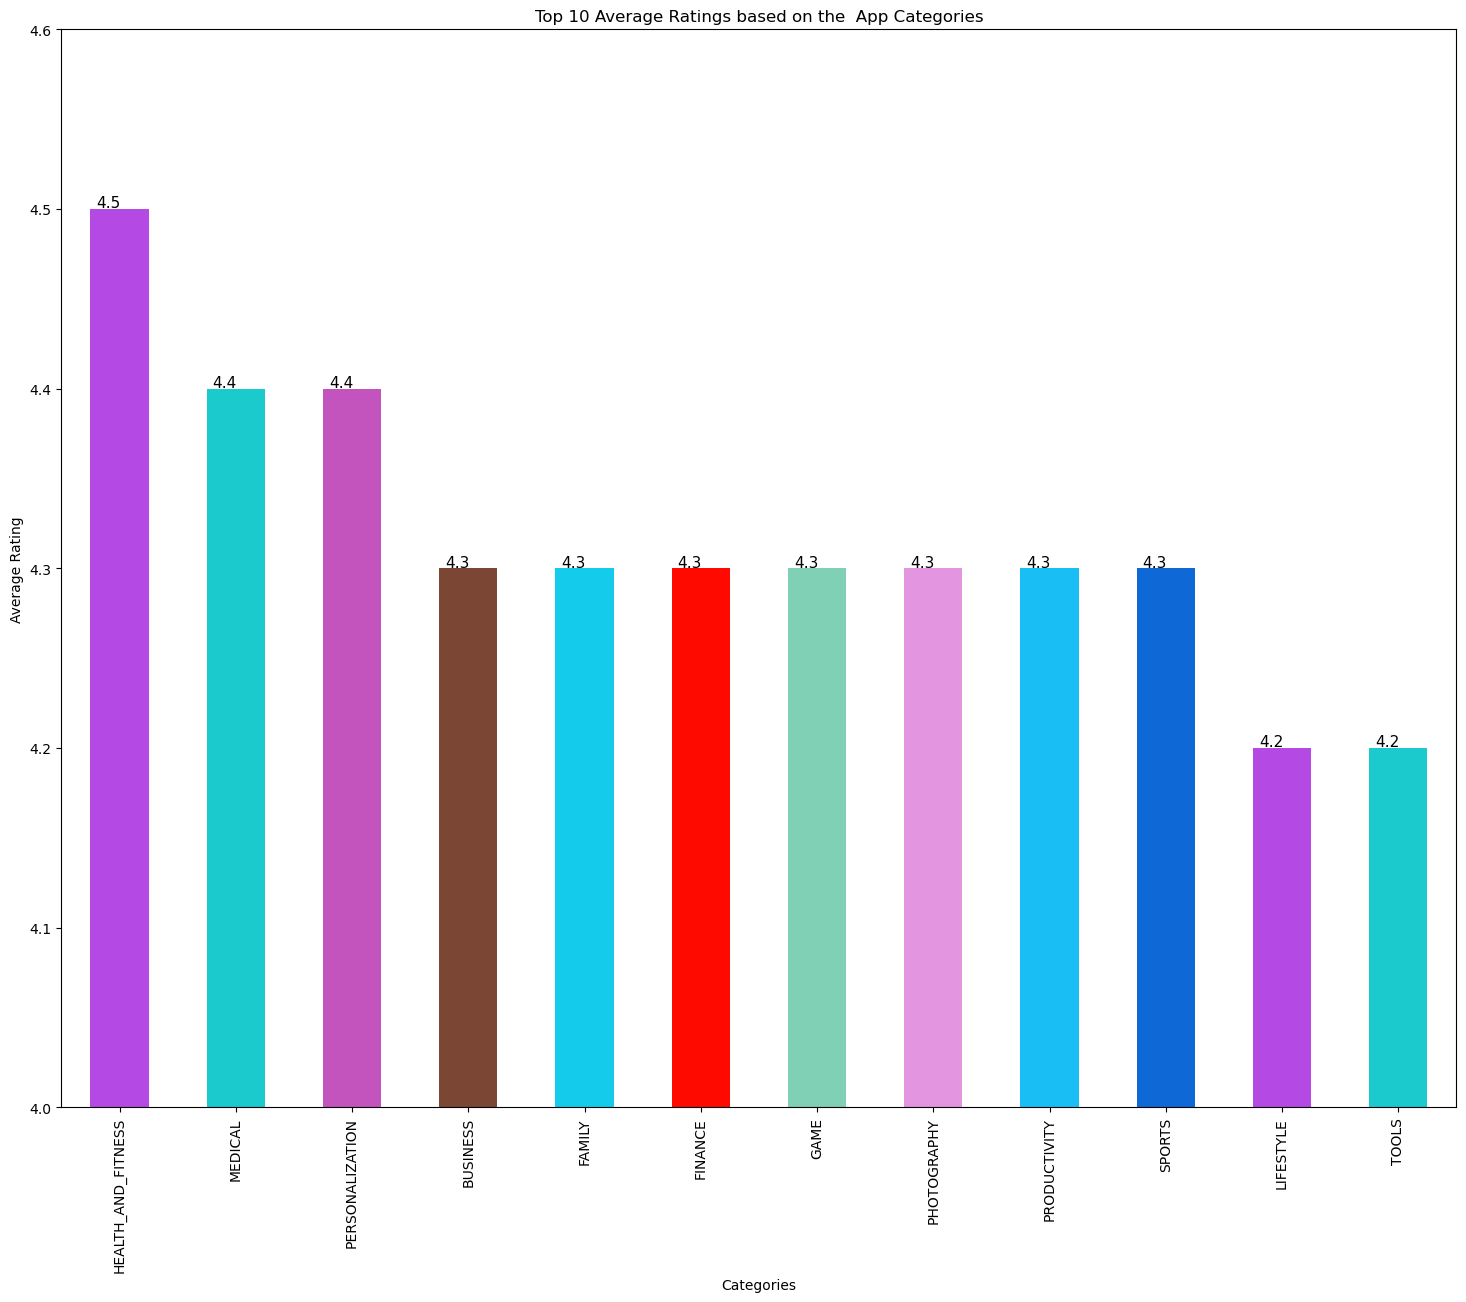

In [53]:
temp = data.groupby('category')['rating'].count().sort_values(ascending = False)

# I want to filter out the categories with more than 200 ratings
cat = []
for index, value in zip(temp.index, temp.values):
    if value > 200:
        cat.append(index)

# plotting the bar chat
top_ratings = data[data.category.isin(cat)].groupby('category')['rating'].median().sort_values(ascending = False)
ax = top_ratings.plot(kind = 'bar', color = colors, figsize = (18, 14))
# annotate the plots                                                                                                             color = colors, figsize = (18, 14))
for i, v in enumerate(top_ratings):
    ax.text(i-0.2, v + 0.0009, str(round(v, 2)), color='black', fontsize=11)
plt.ylim(4.0, 4.6)
plt.title("Top 10 Average Ratings based on the  App Categories") # this title needs to be changed, it does not sound right
plt.xlabel("Categories")
plt.ylabel("Average Rating")
plt.savefig('cat_rating_2.png', bbox_inches = 'tight')
plt.show()

## What is the average size of apps in each category?

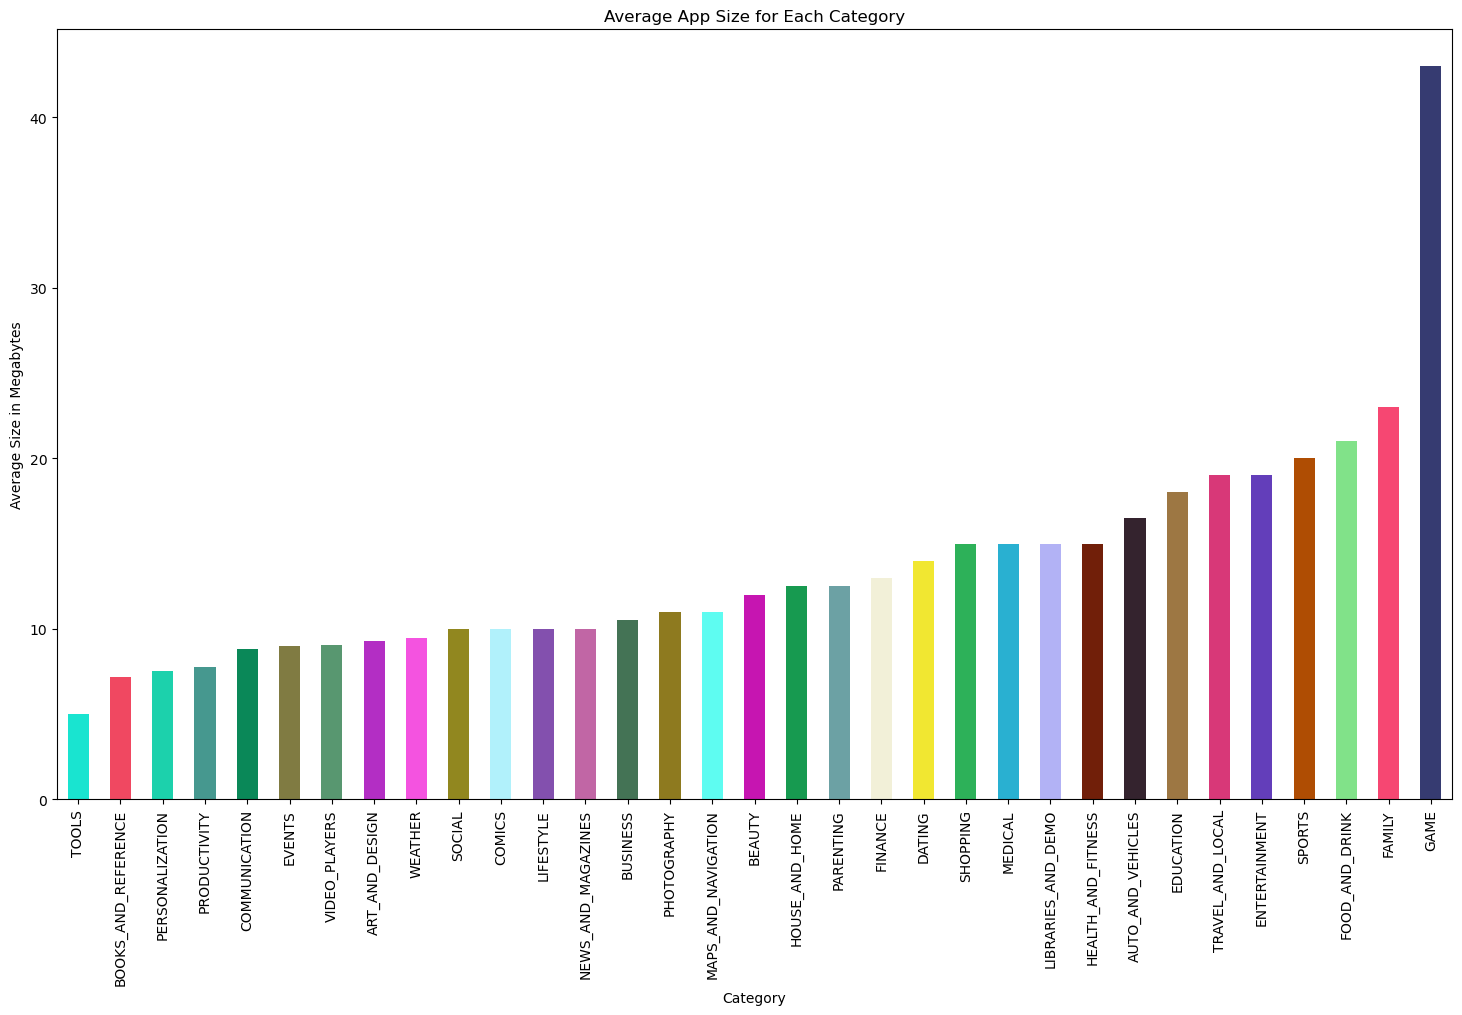

In [55]:
colors = generate_color(data.category.nunique())
data.groupby('category')['size'].median().sort_values(ascending = True).plot(kind = 'bar', color = colors, figsize = (18, 10))
plt.title('Average App Size for Each Category')
plt.ylabel('Average Size in Megabytes')
plt.xlabel("Category")
plt.xticks(rotation = 90)
plt.savefig('size_pic.jpg', bbox_inches = 'tight')
plt.show()